In [304]:
import pyforest

In [305]:
rv = pd.read_csv('RestaurantVisitors.csv', index_col = 'date', parse_dates = True)
# parse Date = True mandatory

<IPython.core.display.Javascript object>

In [306]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [307]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [308]:
rv1 = rv

In [309]:
rv.shape

(517, 8)

In [310]:
rv1.shape

(517, 8)

In [311]:
rv = rv.dropna()

In [312]:
rv.shape

(478, 8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

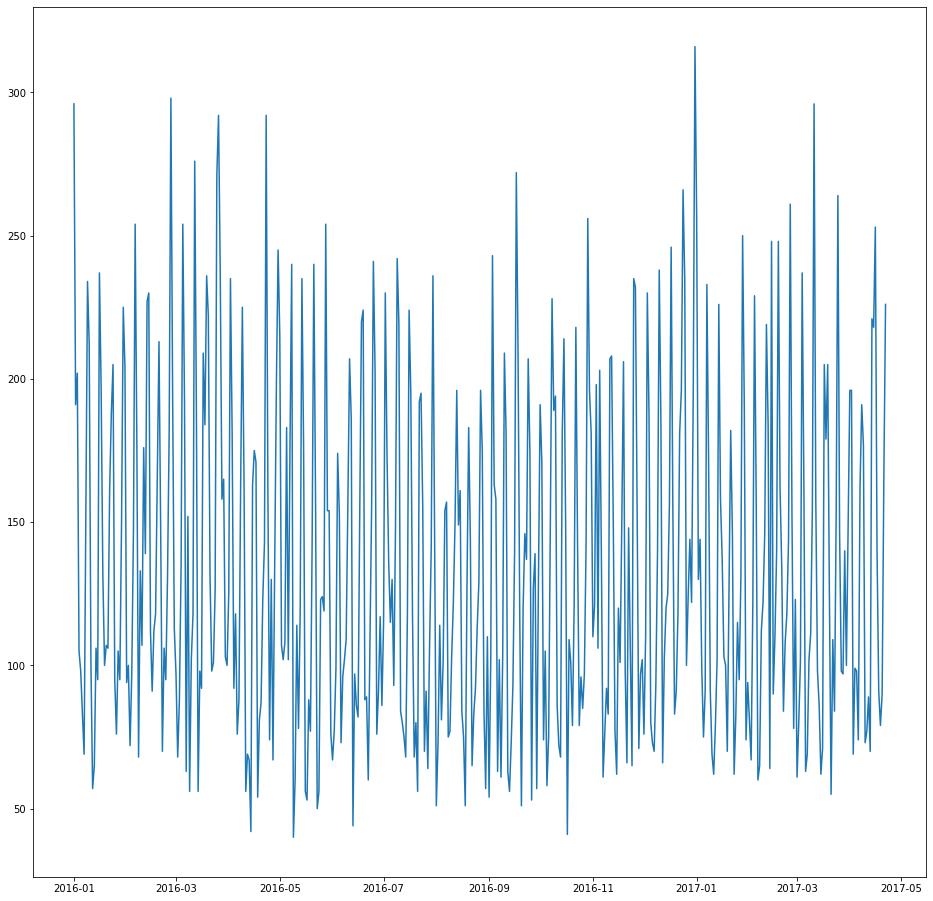

In [313]:
plt.figure(figsize = (16,16))
plt.plot(rv.total)

In [314]:
# rv[rv['holiday'] == 1].index # To get the index position of holidays.

In [315]:
index_pos = rv[rv['holiday'] == 1].index 

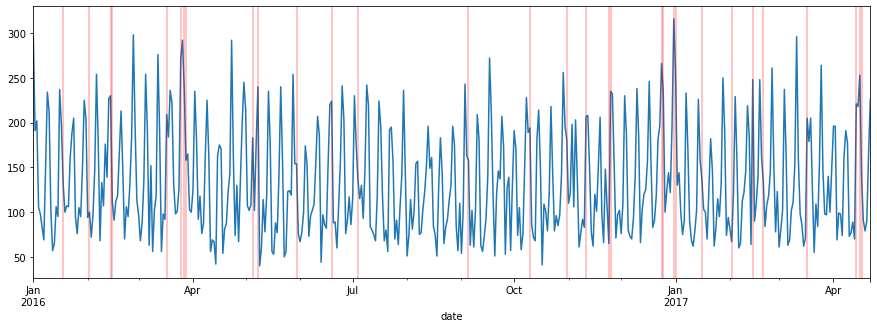

In [316]:
ax = rv['total'].plot(figsize = (15,5))
for day in index_pos:
    ax.axvline(x = day, color = 'red', alpha = 0.3) # axvline is used to draw vertical line

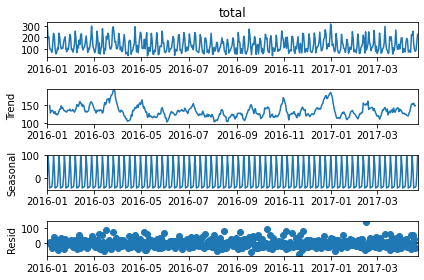

In [317]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal = seasonal_decompose(rv['total'])
rv_seasonal.plot(); # it is just to verify weather seasonal pattern is there or not

In [318]:
# lets do the train test split
# we perform train test and then Validate.
train_rv = rv.iloc[0:450]
test_rv = rv.iloc[450:479]

In [319]:
import pmdarima
from pmdarima import auto_arima
auto_arima(rv['total'], seasonal = True, m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [320]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(train_rv['total'], order=(0, 0, 0), seasonal_order=(1, 0, 1, 7))


C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [321]:
results = model1.fit()

In [322]:
pred_rv = results.predict(start = 450 , end = 477)

In [323]:
pred_rv

2017-03-26    174.190864
2017-03-27     90.608737
2017-03-28     95.759552
2017-03-29     95.480050
2017-03-30     96.689025
2017-03-31    145.286002
2017-04-01    232.774350
2017-04-02    174.179915
2017-04-03     90.603042
2017-04-04     95.753533
2017-04-05     95.474049
2017-04-06     96.682948
2017-04-07    145.276870
2017-04-08    232.759718
2017-04-09    174.168966
2017-04-10     90.597347
2017-04-11     95.747514
2017-04-12     95.468047
2017-04-13     96.676870
2017-04-14    145.267738
2017-04-15    232.745087
2017-04-16    174.158018
2017-04-17     90.591652
2017-04-18     95.741495
2017-04-19     95.462047
2017-04-20     96.670793
2017-04-21    145.258607
2017-04-22    232.730457
Freq: D, Name: predicted_mean, dtype: float64

In [324]:
test_rv.shape

(28, 8)

In [325]:
len(pred_rv)

28

In [326]:
test_rv[test_rv['holiday'] == 1].index # Holidays only for test Data

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

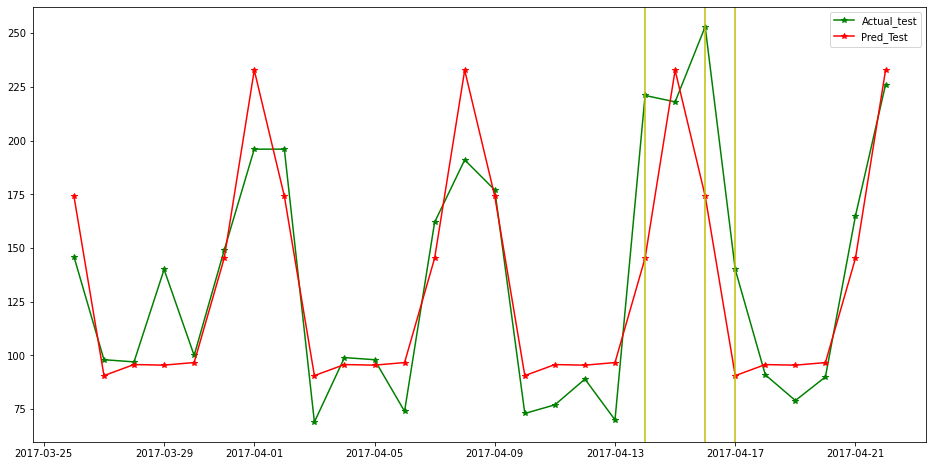

In [327]:
plt.figure(figsize = (16,8))
plt.plot(test_rv.total, marker = '*', color = 'g', label = 'Actual_test')
plt.plot(pred_rv, marker = '*', color = 'r', label = 'Pred_Test')
plt.legend()
plt.axvline(x = '2017-04-14', color = 'y')
plt.axvline(x = '2017-04-16', color = 'y')
plt.axvline(x = '2017-04-17', color = 'y')



In [328]:
error = test_rv.total - pred_rv
error

date
2017-03-26   -28.190864
2017-03-27     7.391263
2017-03-28     1.240448
2017-03-29    44.519950
2017-03-30     3.310975
2017-03-31     3.713998
2017-04-01   -36.774350
2017-04-02    21.820085
2017-04-03   -21.603042
2017-04-04     3.246467
2017-04-05     2.525951
2017-04-06   -22.682948
2017-04-07    16.723130
2017-04-08   -41.759718
2017-04-09     2.831034
2017-04-10   -17.597347
2017-04-11   -18.747514
2017-04-12    -6.468047
2017-04-13   -26.676870
2017-04-14    75.732262
2017-04-15   -14.745087
2017-04-16    78.841982
2017-04-17    49.408348
2017-04-18    -4.741495
2017-04-19   -16.462047
2017-04-20    -6.670793
2017-04-21    19.741393
2017-04-22    -6.730457
dtype: float64

In [329]:
MSE_rv = np.mean(np.square(error))
MSE_rv # 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

875.4817753102388

# TIll this point only Sarima is used X was not used

In [330]:
# sarimax

In [331]:
auto_arima(rv['total'], seasonal = True, m = 7, exogenous = rv[['holiday']])
# exogeneous data frame format beacause more than 1 cols can be taken as x

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [332]:
model2 = SARIMAX(train_rv['total'], 
                 order=(1, 0, 0), 
                 seasonal_order=(1, 0, 1, 7), 
                 exog = train_rv[['holiday']])

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [333]:
results1 = model2.fit()

In [334]:
pred_rv_exog = results1.predict(start = 450 , end = 477, exog = test_rv[['holiday']])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

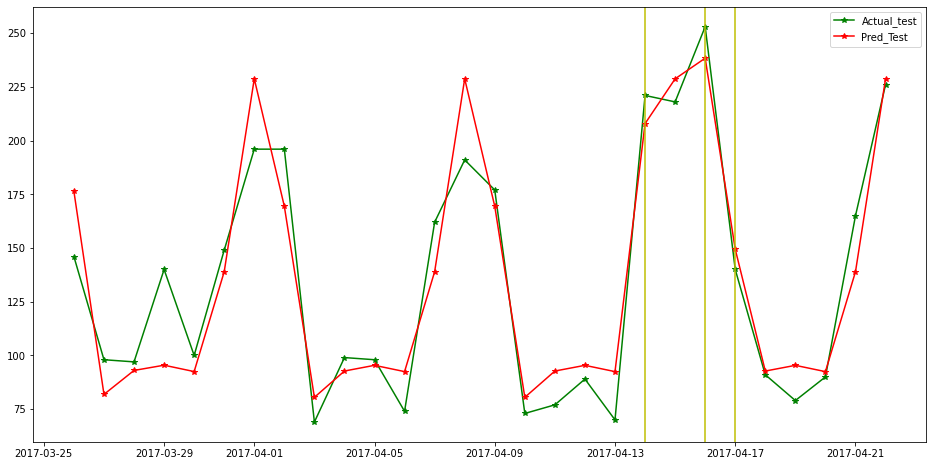

In [335]:
plt.figure(figsize = (16,8))
plt.plot(test_rv.total, marker = '*', color = 'g', label = 'Actual_test')
plt.plot(pred_rv_exog, marker = '*', color = 'r', label = 'Pred_Test')
plt.legend()
plt.axvline(x = '2017-04-14', color = 'y')
plt.axvline(x = '2017-04-16', color = 'y')
plt.axvline(x = '2017-04-17', color = 'y')

In [336]:
er = test_rv.total - pred_rv_exog 

In [337]:
np.mean(np.square(er))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

359.1922405246633

In [338]:
rv1 = rv1.iloc[449:517,]

In [339]:
rv1.shape

(68, 8)

In [340]:
#  478
449 - 517

-68

In [346]:
pred_rv_exog_null = results1.predict(start = 478 , end = 517, exog = rv1[['holiday']])

In [353]:
len(pred_rv_exog_null)

40

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

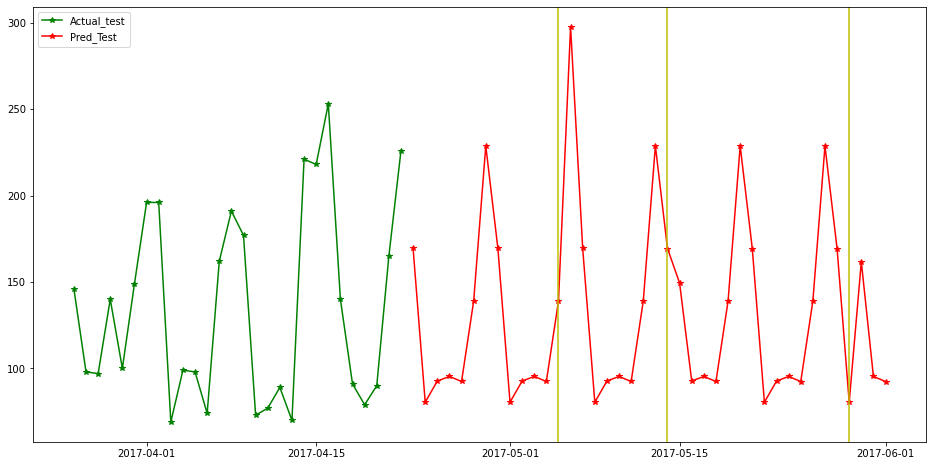

In [351]:
plt.figure(figsize = (16,8))
plt.plot(test_rv.total, marker = '*', color = 'g', label = 'Actual_test')
plt.plot(pred_rv_exog_null, marker = '*', color = 'r', label = 'Pred_Test')
plt.legend()
plt.axvline(x = '2017-05-05', color = 'y')
plt.axvline(x = '2017-05-14', color = 'y')
plt.axvline(x = '2017-05-29', color = 'y')